**NAME:** WAMOZO COSMAS

**STUDENT NUMBER:** 2200701539

**REGISTRATION NUMBER:** 2022/HD05/1539U

## Import packages
Import the necessary packages required to process the data, build, and evaluate the model

In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Delete Corrupt Images

In [3]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.4 MB/s eta 0:00:00


Testing the processing

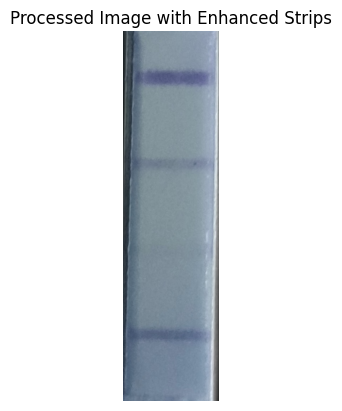

In [12]:
# Since Mahotas is not available, we'll continue using OpenCV for demonstration purposes.

# Load the image again in case the previous transformations affected it
# image = cv2.imread("")
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the provided path
image_path = '/content/drive/MyDrive/Cropped Sickle Cell Images/SS/cropped_20231227_145731.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image back to BGR for OpenCV display functions
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# # Save the processed image
# output_path = '/mnt/data/processed_image.jpg'
# cv2.imwrite(output_path, image)

# Display the processed image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for plt
plt.title("Processed Image with Enhanced Strips")
plt.axis('off')
plt.show()


In [ ]:
!pip install pysift

  Preparing metadata (setup.py) ... done
  Created wheel for pysift: filename=pysift-0.0.2-py3-none-any.whl size=3326 sha256=44e01a09ebfbed19174c558ae3c71fa10fa4653fd26b4ff8504a8a5e16a8aa85
  Stored in directory: /root/.cache/pip/wheels/54/10/74/4559d755d63c115c9286734d31e8f36fa39de6db21b0b12237
Successfully built pysift


1047
1141
1000


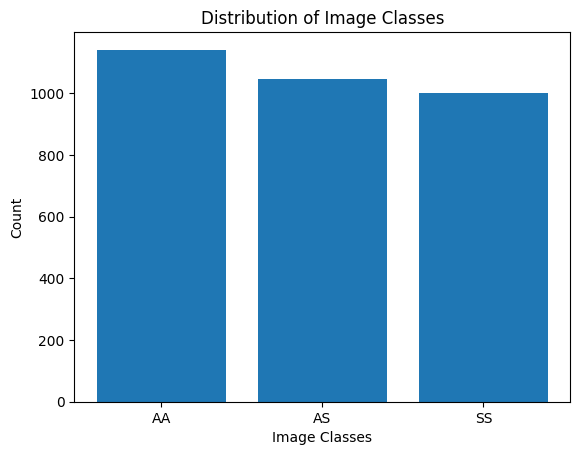

In [13]:

aa_data = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/AA')
aa_images = list(aa_data.glob('*.jpg'))
as_data = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/AS')
as_images = list(as_data.glob('*.jpg'))
ss_data = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/SS')
ss_images= list(ss_data.glob('*.jpg'))

print(len(as_images))
print(len(aa_images))
print(len(ss_images))

image_classes = ['AA', 'AS', 'SS']
class_counts = [len(aa_images), len(as_images),len(ss_images)]

# Create the bar chart
plt.bar(image_classes, class_counts)

# Add labels and title
plt.xlabel('Image Classes')
plt.ylabel('Count')
plt.title('Distribution of Image Classes')

# Display the chart
plt.show()


In [45]:
if not os.path.exists("./processed/AA"):
  os.makedirs("./processed/AA")
if not os.path.exists("./processed/SS"):
  os.makedirs("./processed/SS")
if not os.path.exists("./processed/AS"):
  os.makedirs("./processed/AS")

In [47]:
import os
import pathlib
import cv2
import rembg
import numpy as np
from PIL import Image
import io


def preprocess_images(url, path):
    print("Processing images from:", url, "to", path)
    data = pathlib.Path(url)
    known_images = list(data.glob('*.jpg'))
    total_images = len(known_images)
    counter = 0

    for i in known_images:
        counter += 1
        img_path = str(i)
        if os.path.isfile(img_path):
            img_array = sickle_cell_preprocess(img_path)
            # Save the processed image
            output_filename = f"{counter}.jpg"
            cv2.imwrite(os.path.join(path, output_filename), img_array)
            print(f"Processed image {counter} of {total_images}: {output_filename}")

    print(f"Total number of processed images: {total_images}")

In [5]:
def sickle_cell_preprocess(image_path):
    """
    Preprocesses a sickle cell testing strip image to expose horizontal lines.

    Args:
      image_path: Path to the image file.

    Returns:
      preprocessed_image: The preprocessed image in grayscale with enhanced lines.
    """

    # Read the image and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur for noise reduction
    blur = cv2.GaussianBlur(image, (5, 5), 0)

    # Adaptive thresholding to binarize the image
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Morphological opening to remove noise and gaps
    kernel = np.ones((3, 3), np.uint8)
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # Enhance horizontal lines using horizontal Sobel filtering
    sobelx = cv2.Sobel(opened, -1, 1, 0, ksize=3)

    # Combine thresholding and Sobel results for better line emphasis
    preprocessed_image = cv2.bitwise_or(sobelx, opened)

    return preprocessed_image

In [48]:
# preprocessing AA and saving it
path_to_save = "./processed/AA"
text_images = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/AA')
processed_images = preprocess_images(text_images,path_to_save)

Processing images from: /content/drive/MyDrive/Cropped Sickle Cell Images/AA to ./processed/AA
Processed image 1 of 1141: 1.jpg
Processed image 2 of 1141: 2.jpg
Processed image 3 of 1141: 3.jpg
Processed image 4 of 1141: 4.jpg
Processed image 5 of 1141: 5.jpg
Processed image 6 of 1141: 6.jpg
Processed image 7 of 1141: 7.jpg
Processed image 8 of 1141: 8.jpg
Processed image 9 of 1141: 9.jpg
Processed image 10 of 1141: 10.jpg
Processed image 11 of 1141: 11.jpg
Processed image 12 of 1141: 12.jpg
Processed image 13 of 1141: 13.jpg
Processed image 14 of 1141: 14.jpg
Processed image 15 of 1141: 15.jpg
Processed image 16 of 1141: 16.jpg
Processed image 17 of 1141: 17.jpg
Processed image 18 of 1141: 18.jpg
Processed image 19 of 1141: 19.jpg
Processed image 20 of 1141: 20.jpg
Processed image 21 of 1141: 21.jpg
Processed image 22 of 1141: 22.jpg
Processed image 23 of 1141: 23.jpg
Processed image 24 of 1141: 24.jpg
Processed image 25 of 1141: 25.jpg
Processed image 26 of 1141: 26.jpg
Processed ima

In [49]:
# preprocessing AS and saving it
path_to_save = "./processed/AS"
default_images = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/AS')
processed_images = preprocess_images(default_images,path_to_save)

Processing images from: /content/drive/MyDrive/Cropped Sickle Cell Images/AS to ./processed/AS
Processed image 1 of 1047: 1.jpg
Processed image 2 of 1047: 2.jpg
Processed image 3 of 1047: 3.jpg
Processed image 4 of 1047: 4.jpg
Processed image 5 of 1047: 5.jpg
Processed image 6 of 1047: 6.jpg
Processed image 7 of 1047: 7.jpg
Processed image 8 of 1047: 8.jpg
Processed image 9 of 1047: 9.jpg
Processed image 10 of 1047: 10.jpg
Processed image 11 of 1047: 11.jpg
Processed image 12 of 1047: 12.jpg
Processed image 13 of 1047: 13.jpg
Processed image 14 of 1047: 14.jpg
Processed image 15 of 1047: 15.jpg
Processed image 16 of 1047: 16.jpg
Processed image 17 of 1047: 17.jpg
Processed image 18 of 1047: 18.jpg
Processed image 19 of 1047: 19.jpg
Processed image 20 of 1047: 20.jpg
Processed image 21 of 1047: 21.jpg
Processed image 22 of 1047: 22.jpg
Processed image 23 of 1047: 23.jpg
Processed image 24 of 1047: 24.jpg
Processed image 25 of 1047: 25.jpg
Processed image 26 of 1047: 26.jpg
Processed ima

In [50]:
# preprocessing SS and saving it
path_to_save = "./processed/SS"
text_images = pathlib.Path('/content/drive/MyDrive/Cropped Sickle Cell Images/SS')
processed_images = preprocess_images(text_images,path_to_save)

Processing images from: /content/drive/MyDrive/Cropped Sickle Cell Images/SS to ./processed/SS
Processed image 1 of 1000: 1.jpg
Processed image 2 of 1000: 2.jpg
Processed image 3 of 1000: 3.jpg
Processed image 4 of 1000: 4.jpg
Processed image 5 of 1000: 5.jpg
Processed image 6 of 1000: 6.jpg
Processed image 7 of 1000: 7.jpg
Processed image 8 of 1000: 8.jpg
Processed image 9 of 1000: 9.jpg
Processed image 10 of 1000: 10.jpg
Processed image 11 of 1000: 11.jpg
Processed image 12 of 1000: 12.jpg
Processed image 13 of 1000: 13.jpg
Processed image 14 of 1000: 14.jpg
Processed image 15 of 1000: 15.jpg
Processed image 16 of 1000: 16.jpg
Processed image 17 of 1000: 17.jpg
Processed image 18 of 1000: 18.jpg
Processed image 19 of 1000: 19.jpg
Processed image 20 of 1000: 20.jpg
Processed image 21 of 1000: 21.jpg
Processed image 22 of 1000: 22.jpg
Processed image 23 of 1000: 23.jpg
Processed image 24 of 1000: 24.jpg
Processed image 25 of 1000: 25.jpg
Processed image 26 of 1000: 26.jpg
Processed ima

Adding categorical

In [5]:
import os
import random
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import StratifiedKFold, train_test_split
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Embedding, Concatenate,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import keras
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
# Set the path to the image folder
image_path = './processed/'

# Load the images from the specified path
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale pixel values to [0, 1]
image_size = (299, 299)
batch_size = 32

# Load the images and labels using the ImageDataGenerator
image_generator = datagen.flow_from_directory(
    image_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    # validation_split=0.2  # Specify the validation split
)

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 3188 images belonging to 3 classes.


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
def custom_preprocessing(image):
    # Apply the Xception preprocessing
    image = preprocess_input(image)

    # Apply Gaussian blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Adjust contrast
    # This is a simple method to change contrast
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 0     # Brightness control (0-100)
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    return image

# Initialize the ImageDataGenerator with the custom preprocessing function
datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    # Add other augmentation parameters here if needed
)

image_path = '/content/drive/MyDrive/Cropped Sickle Cell Images'
image_size = (299, 299)
batch_size = 32

# Load the images and labels using the ImageDataGenerator
image_generator = datagen.flow_from_directory(
    image_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3188 images belonging to 3 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from collections import Counter

In [54]:
from keras.applications.xception import Xception
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

def create_xception_model():
    # Define the Xception model
    xception_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    # Freeze the layers of the pre-trained Xception model
    for layer in xception_model.layers:
        layer.trainable = False

    # Add custom layers on top of the pre-trained model
    x = xception_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(3, activation='softmax')(x)  # Assuming 3 classes for classification
    model = Model(inputs=xception_model.input, outputs=x)
    return model


In [30]:
def create_model():
    model = keras.models.Sequential([
        layers.Conv2D(128, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_initializer='normal'),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu", kernel_initializer='normal'),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(3, activation='softmax', kernel_initializer='normal')
    ])
    return model


In [47]:
import os
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to your main directory
image_path = '/content/drive/MyDrive/Sickle Cell No Bg Images'

# This will hold all file paths and their labels
dataset = []
labels = []

# Loop through all folders in the directory
for folder in os.listdir(image_path):
    if os.path.isdir(os.path.join(image_path, folder)):
        # Each folder represents a class
        class_label = folder

        # Loop through all files in the folder
        for file in os.listdir(os.path.join(image_path, folder)):
            # Construct the full file path
            file_path = os.path.join(image_path, folder, file)

            # Add the file path and its class label to the lists
            dataset.append(file_path)
            labels.append(class_label)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_xception_model():
    xception_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    for layer in xception_model.layers:
        layer.trainable = False
    x = xception_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=xception_model.input, outputs=x)
    return model

# Define the number of folds for stratified k-fold sampling
num_folds = 2
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Initialize the ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

# Initialize the ImageDataGenerator without augmentation for validation
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Assuming dataset and labels are defined
# dataset = # Your dataset here
# labels = # Your labels here

# Assuming image_path is defined
image_path = '/content/drive/MyDrive/Sickle Cell No Bg Images'
image_size = (299, 299)
batch_size = 32

# Loop over each fold
for fold, (train_index, val_index) in enumerate(skf.split(np.arange(len(dataset)), labels)):
    # Create generators for training and validation sets
    train_generator = train_datagen.flow_from_directory(
        image_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    val_generator = val_datagen.flow_from_directory(
        image_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        subset='validation'
    )

    # Reinitialize the model for each fold
    model = create_xception_model()
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(train_generator, epochs=50, verbose=1)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(val_generator, verbose=0)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")

    # Further analysis and storage of results can be added here as needed


Found 4210 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Epoch 1/50
 10/132 [=>............................] - ETA: 55:59 - loss: 0.9423 - accuracy: 0.5621

Stratified Sampling

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from collections import Counter

# Define the number of folds for stratified k-fold sampling
num_folds = 2
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Initialize variables
model = None
fold_accuracy = []
y_true = []
y_pred = []

# Assuming image_generator is defined and produces batches of images and integer labels
for _ in range(len(image_generator)):
    batch_images, batch_labels = image_generator.next()

    # Ensure labels are integer values for stratification
    batch_labels = np.argmax(batch_labels, axis=1)

    # Split the data into training and validation sets for the current fold
    for fold, (train_index, val_index) in enumerate(skf.split(batch_images, batch_labels)):
        X_train, X_val = batch_images[train_index], batch_images[val_index]
        y_train, y_val = batch_labels[train_index], batch_labels[val_index]

        # Convert labels back to categorical format for training and validation
        y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
        y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)

        if model is None:
            model = create_xception_model()
            # Compile the model
            optimizer = Adam(learning_rate=1e-3)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model on the current fold
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

        # Evaluate the model on the validation set
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracy.append(accuracy)

        # Store predictions and true labels for each fold
        y_pred_val = model.predict(X_val)
        y_pred_val_classes = np.argmax(y_pred_val, axis=1)
        y_val_classes = np.argmax(y_val, axis=1)
        y_true.append(y_val_classes)
        y_pred.append(y_pred_val_classes)

# Concatenate the predictions and true labels from all folds
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(fold_accuracy)
print("Average Accuracy:", average_accuracy)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 128ms/step - loss: 8.1956e-08 - accuracy: 1.0000
Epoch 27/50
1/1 [==============================] - 0s 132ms/step - loss: 7.4506e-08 - accuracy: 1.0000
Epoch 28/50
1/1 [==============================] - 0s 124ms/step - loss: 8.1956e-08 - accuracy: 1.0000
Epoch 29/50
1/1 [==============================] - 0s 123ms/step - loss: 8.1956e-08 - accuracy: 1.0000
Epoch 30/50
1/1 [==============================] - 0s 128ms/step - loss: 8.9407e-08 - accuracy: 1.0000
Epoch 31/50
1/1 [==============================] - 0s 129ms/step - loss: 8.9407e-08 - accuracy: 1.0000
Epoch 32/50
1/1 [==============================] - 0s 124ms/step - loss: 8.9407e-08 - accuracy: 1.0000
Epoch 33/50
1/1 [==============================] - 0s 130ms/step - loss: 9.6858e-08 - accuracy: 1.0000
Epoch 34/50
1/1 [==============================] - 0s 126ms/step - loss: 9.6858e-08 - accuracy: 1.0000
Epoch 35/50
1/1 [=================

In [20]:
# Save the model to a file
model.save('/content/drive/MyDrive/strat_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

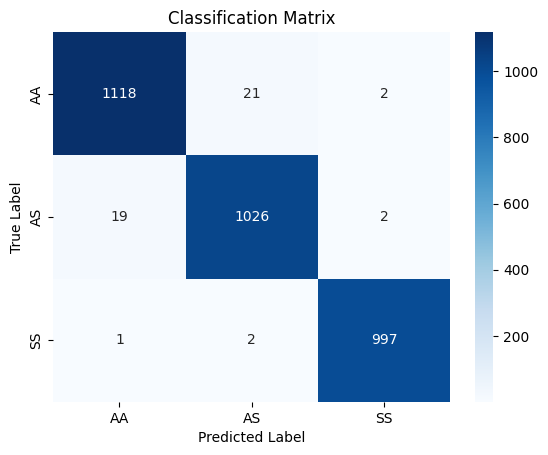

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the classification matrix
classification_matrix = confusion_matrix(y_true, y_pred)

# Define the class labels
class_labels = ["AA", "AS","SS"]

# Create a heatmap of the classification matrix using Seaborn
sns.heatmap(classification_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Classification Matrix")

# Display the plot
plt.show()


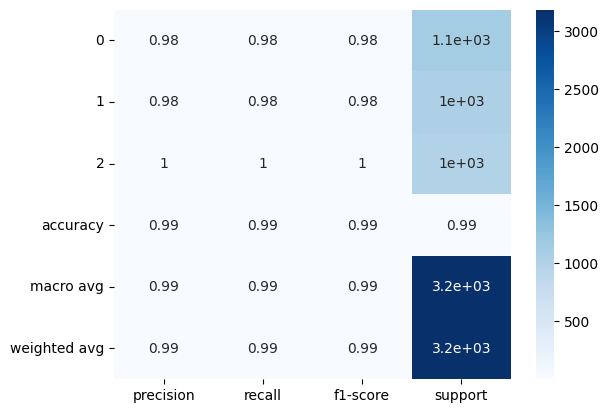

In [59]:
import seaborn as sns

# Calculate the classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report using a heatmap
sns.heatmap(report_df, annot=True, cmap='Blues')

# Display the plot
plt.show()


# Model Evaluation


EVALUATING THE MODEL

In [14]:
!pip install rembg


In [21]:
import urllib.request
from urllib import response
from skimage import transform
from rembg import remove

In [22]:
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, create a model that maps the input image to the activations of the last conv layer
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the target class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the target class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [62]:
from IPython.display import Image, display
import matplotlib.pyplot as plt


In [40]:
def predict_and_visualize(image_path, model, last_conv_layer_name):
    # Preprocess the image
    img_array = preprocess_image_for_prediction(image_path)

    # Make model predictions
    prediction, confidence = predict_image(model, image_path)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Load the original image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))

    # Create a heatmap
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = heatmap * 0.4 + img
    superimposed_img = superimposed_img.clip(0, 255).astype('uint8')  # Ensure the image is in the range [0, 255] and convert to uint8

    # Convert to RGB
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    # Display using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed_img / 255)
    plt.axis('off')
    plt.show()

    return prediction, confidence


/content/drive/MyDrive/Unseen Kits/AA/20231005_164400(0).jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164400.jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164402.jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164403(0).jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164403.jpg

1/1 [==============================] - 1s 735ms/step


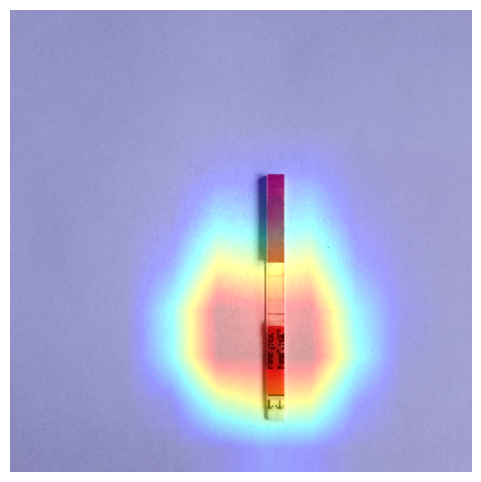

The image is predicted to be: SS with 99.98% confidence


In [46]:
last_conv_layer_name = "block14_sepconv2_act"  # This is typically the last conv layer for Xception
# last_conv_layer_name = "dense_9"  # This is typically the last conv layer for Xception
# model_path = "/content/drive/MyDrive/strat_xcpetion_cropped_model.h5"
model_path = "/content/drive/MyDrive/strat_model.h5"

img_path = "/content/drive/MyDrive/Unseen Kits/AA/20231005_165954(0).jpg"
trained_model = load_model(model_path)

prediction, confidence = predict_and_visualize(img_path, trained_model, last_conv_layer_name)
print(f"The image is predicted to be: {prediction} with {confidence}% confidence")


In [29]:
import cv2
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np
import cv2

from PIL import Image
import io


def load_model(model_path):
    """Load the trained model from the given path."""
    model = keras.models.load_model(model_path)
    return model

def preprocess_image_for_prediction(image_path, target_size=(299, 299)):
    # Read the image file
    with open(image_path, 'rb') as f:
        img_data = f.read()

    # Remove the background
    img_data_no_bg = remove(img_data)

    # Convert the image data to a PIL image
    img_no_bg = Image.open(io.BytesIO(img_data_no_bg))

    # Resize the image to the target size
    img_resized = img_no_bg.resize(target_size)

    # Convert the PIL image to a numpy array
    img_array = image.img_to_array(img_resized)

    # Check if the image has 4 channels (RGBA) and remove the alpha channel
    if img_array.shape[-1] == 4:
        img_array = img_array[:, :, :3]

    # Preprocess the image for the model
    img_preprocessed = preprocess_input(img_array)

    # Add an extra dimension to create a batch of one image
    img_batch = np.expand_dims(img_preprocessed, axis=0)

    return img_batch

def predict_image(model, img_path):
    """
    Predict the class of a new image using the trained model.
    """
    preprocessed_img = preprocess_image_for_prediction(img_path)
    probabilities = model.predict(preprocessed_img)[0]  # Getting the probabilities for all classes

    # You might want to format the probabilities to make it more readable, e.g., rounding it
    formatted_probabilities = [round(prob * 100, 2) for prob in probabilities]  # Converts probabilities to percentage and rounds to 2 decimal places


    # Getting the predicted class index
    predicted_class_index = np.argmax(probabilities)

    # Mapping the index to the corresponding class
    class_mapping = {0: "AA", 1: "AS", 2: "SS"}
    predicted_class = class_mapping[predicted_class_index]

    # Returning the predicted class along with the confidence
    confidence = formatted_probabilities[predicted_class_index]

    return predicted_class, confidence

model_path = "/content/drive/MyDrive/strat_model.h5"
trained_model = load_model(model_path)
img_path = "/content/drive/MyDrive/Unseen Kits/AA/20231005_164711(0).jpg"  # Replace this with the path of the image you want to test
prediction, confidence = predict_image(trained_model, img_path)
print(f"The image is predicted to be: {prediction} with {confidence}% confidence")


1/1 [==============================] - 1s 840ms/step
The image is predicted to be: AA with 89.95% confidence


In [36]:
from sklearn.metrics import confusion_matrix
import os
import numpy as np
from tensorflow.keras.models import load_model
class_mapping = {0: "AA", 1: "AS", 2: "SS"}

def predict_images(model, img_paths):
    predictions = []
    confidences = []
    for img_path in img_paths:
        preprocessed_img = preprocess_image_for_prediction(img_path)
        probabilities = model.predict(preprocessed_img)[0]
        predicted_class_index = np.argmax(probabilities)
        class_mapping = {0: "AA", 1: "AS", 2: "SS"}
        predicted_class = class_mapping[predicted_class_index]
        confidence = round(probabilities[predicted_class_index] * 100, 2)
        predictions.append(predicted_class)
        confidences.append(confidence)
    return predictions, confidences

def load_images_and_labels(base_path, max_images_per_class=100):
    class_mapping = {"AA": 0, "AS": 1, "SS": 2}
    img_paths = []
    labels = []

    for class_folder in class_mapping:
        folder_path = os.path.join(base_path, class_folder)
        image_counter = 0
        for img_name in sorted(os.listdir(folder_path)):
            if image_counter < max_images_per_class:
                img_paths.append(os.path.join(folder_path, img_name))
                labels.append(class_mapping[class_folder])
                image_counter += 1
            else:
                break

    return img_paths, labels

# Load model and images
model_path = "/content/drive/MyDrive/strat_model.h5"
trained_model = load_model(model_path)
base_path = "/content/drive/MyDrive/Unseen Kits"
img_paths, true_labels = load_images_and_labels(base_path)

# Predict and calculate confusion matrix
predicted_classes, _ = predict_images(trained_model, img_paths)


1/1 [==============================] - 0s 21ms/step


In [37]:
class_mapping = {"AA": 0, "AS": 1, "SS": 2}

cm = confusion_matrix(true_labels, [class_mapping[p] for p in predicted_classes], labels=[0, 1, 2])

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[38  2 60]
 [ 0  0  0]
 [16  0 84]]


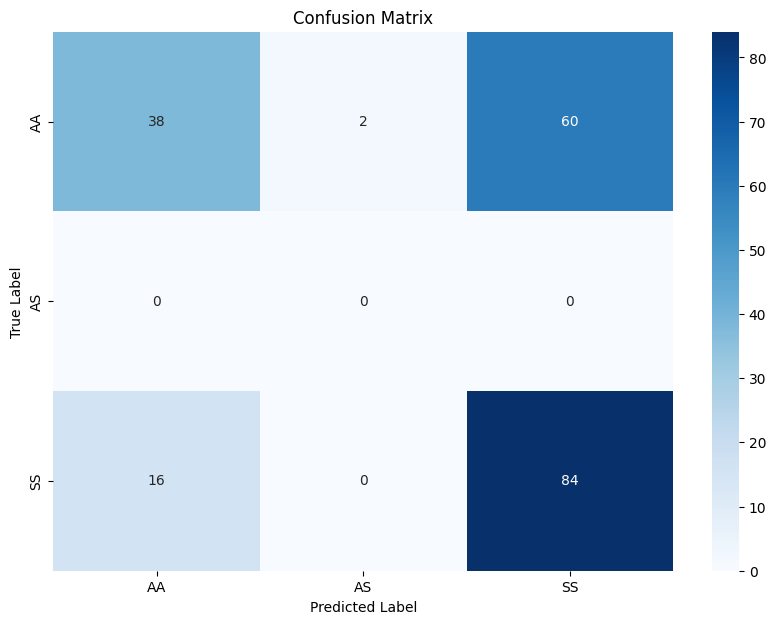

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_labels and predicted_classes are available from the previous context
# and cm is the confusion matrix calculated
class_mapping = {"AA": 0, "AS": 1, "SS": 2}
cm = confusion_matrix(true_labels, [class_mapping[p] for p in predicted_classes], labels=[0, 1, 2])

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=list(class_mapping.keys()),
            yticklabels=list(class_mapping.keys()))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Assuming true_labels, predicted_classes, and img_paths are already defined
misclassified_images = []

for img_path, true_label, predicted_class in zip(img_paths, true_labels, predicted_classes):
    if true_label == class_mapping["AA"] and predicted_class == "SS":
        misclassified_images.append(img_path)


/content/drive/MyDrive/Unseen Kits/AA/20231005_164400(0).jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164400.jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164402.jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164403(0).jpg
/content/drive/MyDrive/Unseen Kits/AA/20231005_164403.jpg


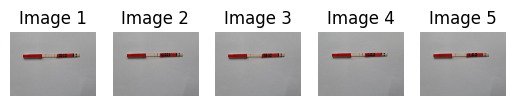

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming misclassified_images list is already defined
# Display the first five images
for i, img_path in enumerate(misclassified_images[:5]):
    try:
        print(img_path)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)  # Plotting 5 images in a row
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    except IOError:
        print(f"Error loading image: {img_path}")

plt.show()


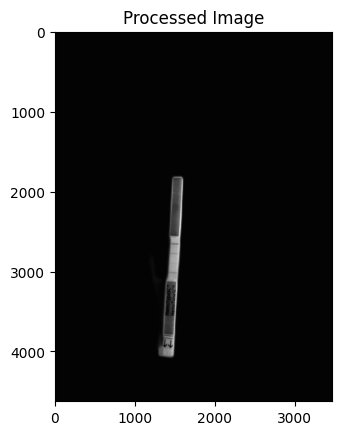

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pathlib

def preprocess_and_show_image(img_path):
    # Check if the image file exists
    if pathlib.Path(img_path).is_file():
        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
                # Split the image into its color channels
            channels = cv2.split(img)

            # Apply CLAHE to each channel
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            clahe_channels = [clahe.apply(channel) for channel in channels]

            # Merge the channels back
            contrast_enhanced = cv2.merge(clahe_channels)

            # # Normalize the image
            # contrast_enhanced = contrast_enhanced / 255.0

            # Display the processed image
            plt.imshow(cv2.cvtColor(contrast_enhanced, cv2.COLOR_GRAY2RGB))
            plt.title("Processed Image")
            plt.show()
        else:
            print("Image not found or unable to read.")
    else:
        print("Provided path does not point to a file.")


# Example usage (replace 'path_to_your_image.jpg' with your actual image path)
preprocess_and_show_image('/content/drive/MyDrive/Sickle Cell No Bg Images/SS/20231227_145750(0).jpg')


In [ ]:
# After defining your image_generator
class_indices = image_generator.class_indices
print("Class indices:", class_indices)


Class indices: {'AA': 0, 'AS': 1, 'SS': 2}
